# CTA 2.0

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

from cvx.simulator import Portfolio
from cvx.simulator import interpolate

In [2]:
# Load prices
prices = pd.read_csv("data/Prices_hashed.csv", index_col=0, parse_dates=True)

# interpolate the prices
prices = prices.apply(interpolate)

In [3]:
# take two moving averages and apply the sign-function, adjust by volatility
def f(price, fast=32, slow=96, volatility=32):
    s = price.ewm(com=slow, min_periods=300).mean()
    f = price.ewm(com=fast, min_periods=300).mean()
    std = price.pct_change().ewm(com=volatility, min_periods=300).std()
    return np.sign(f-s)/std

In [4]:
from ipywidgets import Label, HBox, VBox, IntSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
vola = IntSlider(min=4, max=192, step=4, value=32)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average"), Label("Volatility")])
right_box = VBox([fast, slow, vola])
HBox([left_box, right_box])

In [5]:
pos = 1e5*f(prices, fast=fast.value, slow=slow.value, volatility=vola.value)
portfolio = Portfolio.from_cashpos_prices(prices=prices, cashposition=pos, aum=1e8)

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position
* Only 3 **free parameters** used here.
* Only 4 lines of code
* Scaling the bet-size by volatility has improved the situation.

Results do not look terrible but...
* No concept of risk integrated 

Often hedge funds outsource the risk management to some board or committee
and develop machinery for more systematic **parameter-hacking**.

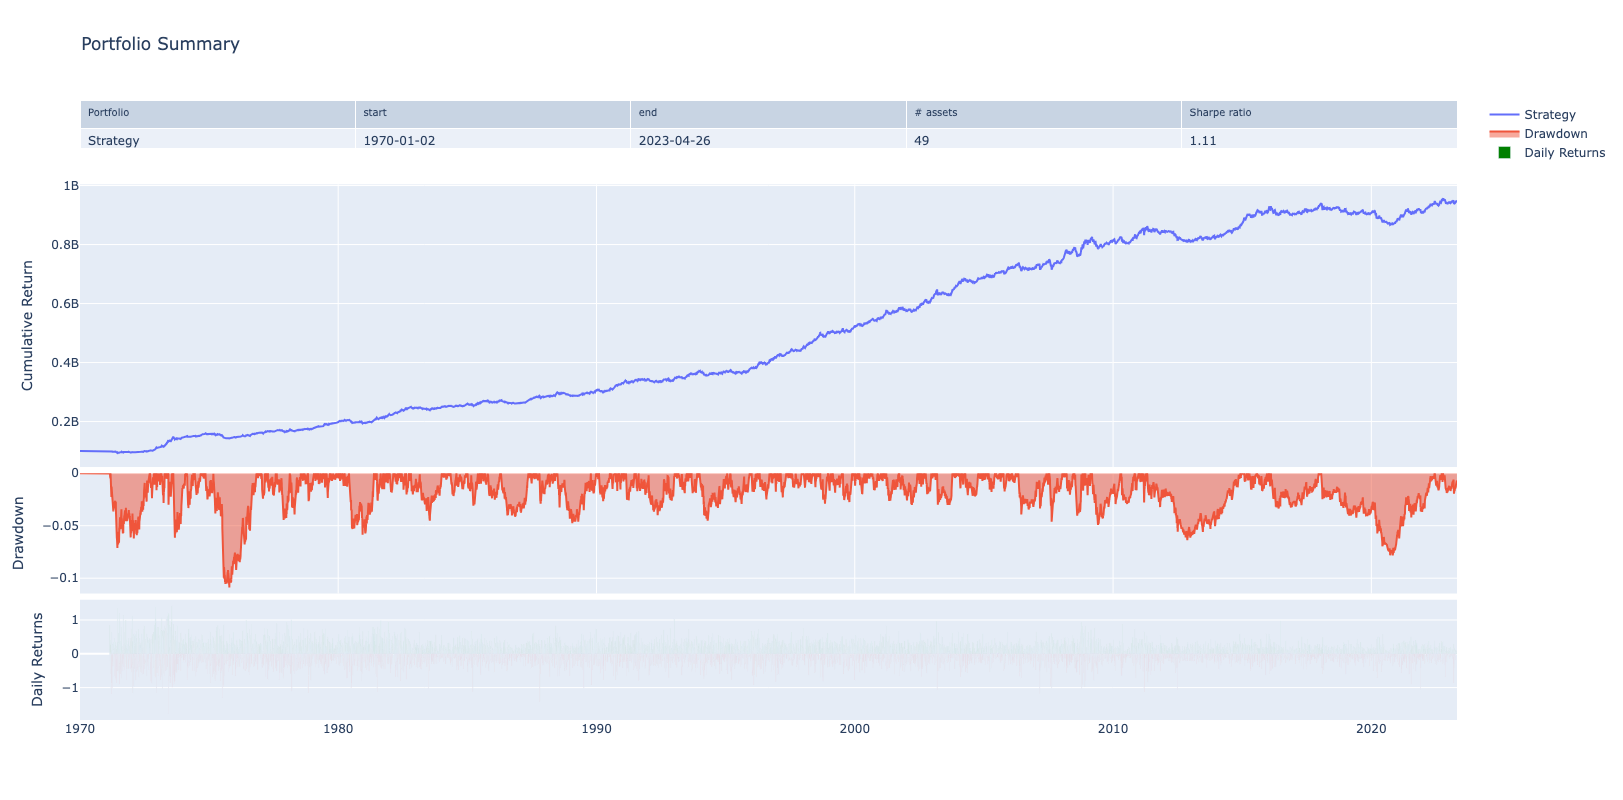

In [6]:
portfolio.snapshot()